In [39]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt


In [9]:
training_data = datasets.FashionMNIST(
    root = 'C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/',
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.FashionMNIST(
    root = 'C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████████████████████████████████████████████████████| 26421880/26421880 [00:15<00:00, 1744736.95it/s]


Extracting C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw/train-images-idx3-ubyte.gz to C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 221254.70it/s]


Extracting C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw/train-labels-idx1-ubyte.gz to C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████| 4422102/4422102 [00:02<00:00, 1549402.11it/s]


Extracting C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 12976128.00it/s]


Extracting C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to C:/Users/Altaf Ur Rahman/Documents/GitHub/ML-Algorithms-from-Scratch/FashionMNIST/raw



Iterating and Visualizing the dataset

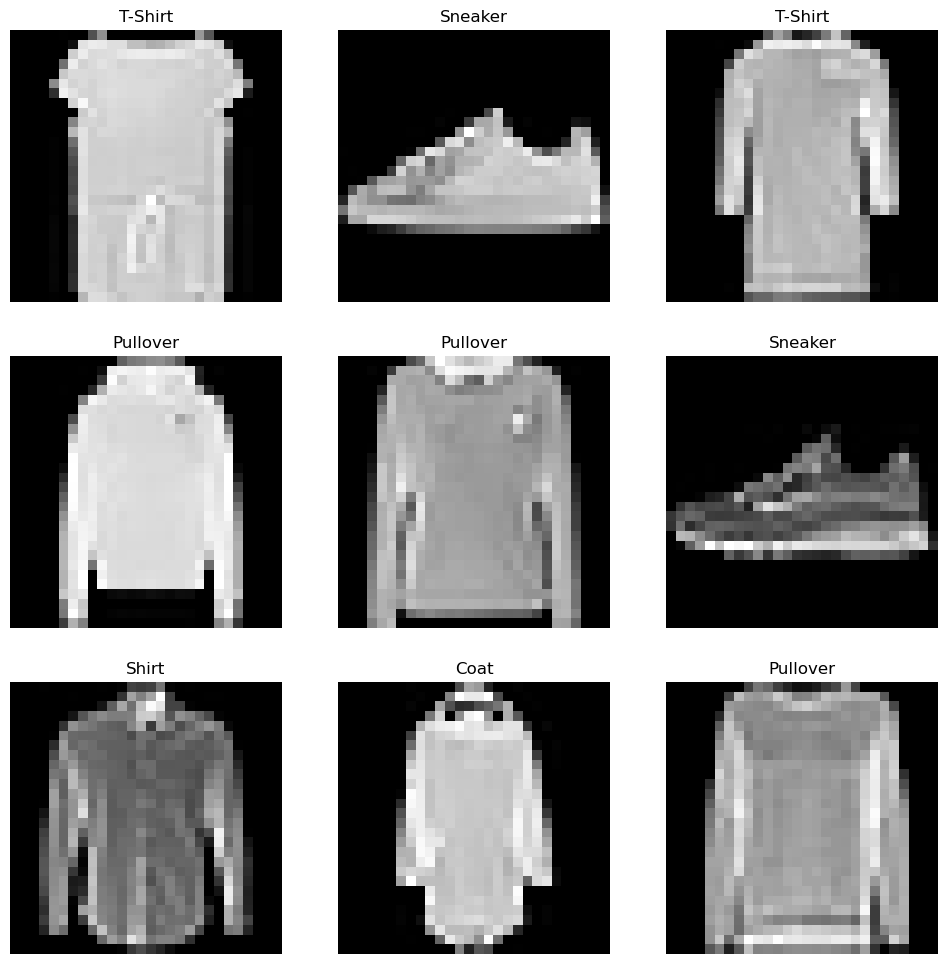

In [19]:
# Degining our labels in dictionary format as the training set labels only represent numbers
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize = (12,12))
rows , cols = 3,3
for i in range(1, rows*cols+1):
    sample_index = torch.randint(len(training_data), size=(1,)).item()
    img , label = training_data[sample_index]
    plt.subplot(rows, cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = 'gray')
    

In [21]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


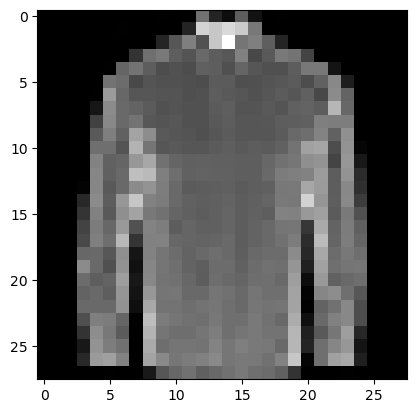

Label: 6


In [22]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Creating a Custom Dataset for your files


In [23]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

***Transforms***

In [35]:
# data is needed to be transformed into format for the Network

from torchvision.transforms import ToTensor, Lambda
ds = datasets.FashionMNIST(
    root = 'data',
    download = False,
    transform = ToTensor,
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(torch.tensor(y), value = 1))
    
)
#here lambda converts label y into one hot encoding vector

In [44]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            
        )
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
        
        

In [46]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [54]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7], device='cuda:0')


In [55]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [56]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [57]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [58]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.7107,  0.1332,  0.4446,  0.4760,  0.0401, -0.5642,  0.8299,  0.2281,
         -0.2146, -0.3488,  0.1026, -0.8665, -0.3841,  0.1104, -0.2698,  0.3595,
          0.0334, -0.0856,  0.1495, -0.4004],
        [-0.0595,  0.2934,  0.2880,  0.1308, -0.0031, -0.0771,  0.6819, -0.1028,
         -0.0256, -0.5363,  0.5320, -0.7731, -0.4342,  0.4886, -0.2813,  0.3094,
         -0.3163, -0.3426, -0.1505, -0.1380],
        [ 0.3506, -0.0217,  0.1145,  0.0049,  0.0964, -0.9540,  0.6507,  0.1340,
         -0.1496, -0.4206,  0.4102, -0.5338, -0.2892,  0.1301, -0.1743,  0.8307,
         -0.3662, -0.1665, -0.2888, -0.2885]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.7107, 0.1332, 0.4446, 0.4760, 0.0401, 0.0000, 0.8299, 0.2281, 0.0000,
         0.0000, 0.1026, 0.0000, 0.0000, 0.1104, 0.0000, 0.3595, 0.0334, 0.0000,
         0.1495, 0.0000],
        [0.0000, 0.2934, 0.2880, 0.1308, 0.0000, 0.0000, 0.6819, 0.0000, 0.0000,
         0.0000, 0.5320, 0.0000, 0.0000, 0.4886, 0.00

In [60]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [61]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [62]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0142,  0.0209,  0.0090,  ...,  0.0346, -0.0081,  0.0139],
        [ 0.0287,  0.0214,  0.0356,  ..., -0.0188, -0.0101, -0.0307]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0205, -0.0248], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 3.4372e-02, -4.2672e-03, -1.8914e-02,  ...,  2.0974e-02,
         -1.4825e-02,  4.1457e-02],
        [ 5.7752e-03, -1.0674e-05,  1.9471e-03,  ...,  2.4906e-02,
      

AutoGrad for computing gradients for backpropagation